<a href="https://colab.research.google.com/github/ThomasAlbin/Astroniz-YT-Tutorials-HIDDEN/blob/main/CompressedCosmos_Saturns_Ring_astropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import get_body, SphericalRepresentation

# Define start and end time of your computation
start_time = Time("2025-01-01")
end_time = Time("2026-01-01")

# Create time range in n_inter intervals
n_inter = 1000
times = start_time + np.linspace(0, (end_time - start_time).value, n_inter) * u.day

In [2]:
# Get Saturn's position in the ICRS (Earth-centered) frame
saturn = get_body("saturn", times)

# Get Earth's position
earth = get_body("earth", times)

# Geocentric Saturnian position
earth_to_saturn = saturn.cartesian - earth.cartesian

print(saturn[:10])

<SkyCoord (GCRS: obstime=['2025-01-01 00:00:00.000' '2025-01-01 08:46:07.568'
 '2025-01-01 17:32:15.135' '2025-01-02 02:18:22.703'
 '2025-01-02 11:04:30.270' '2025-01-02 19:50:37.838'
 '2025-01-03 04:36:45.405' '2025-01-03 13:22:52.973'
 '2025-01-03 22:09:00.541' '2025-01-04 06:55:08.108'], obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    [(346.18557757, -8.05568305, 10.02546724),
     (346.21104448, -8.04423414, 10.03089031),
     (346.23667872, -8.0327184 , 10.03629685),
     (346.26247945, -8.02113619, 10.04168666),
     (346.28844581, -8.00948786, 10.04705954),
     (346.31457695, -7.99777379, 10.0524153 ),
     (346.34087197, -7.98599434, 10.05775373),
     (346.36733001, -7.9741499 , 10.06307465),
     (346.39395017, -7.96224083, 10.06837786),
     (346.42073155, -7.95026753, 10.07366318)]>


In [3]:
# Saturn's north pole (J2000)
# Got this values from Wikipedia
saturn_np_ra = np.radians(40.589)
saturn_np_dec = np.radians(83.537)

# Compute the corresponding spherical coordinates
saturn_np_sphere_coords = SphericalRepresentation(lon=saturn_np_ra * u.rad,
                                                  lat=saturn_np_dec * u.rad,
                                                  distance=1 * u.one) #u.one is a dimensionless unit

# Convert back to to cartesian representation
saturn_np_cart_coords = saturn_np_sphere_coords.to_cartesian()

In [4]:
ring_angles = []

s_np = saturn_np_cart_coords.xyz.value
for e2s in earth_to_saturn.xyz.value.T:

    # Dot product
    dot_product = np.sum(e2s * s_np)

    # Calculate the magnitudes
    magnitude_a = np.linalg.norm(e2s)
    magnitude_b = np.linalg.norm(s_np)

    cos_angle = dot_product / (magnitude_a * magnitude_b)

    # Calculate the angle -90 degrees to account for edge view angle
    angle_temp = np.degrees(np.arccos(cos_angle)) - 90

    ring_angles.append(angle_temp)

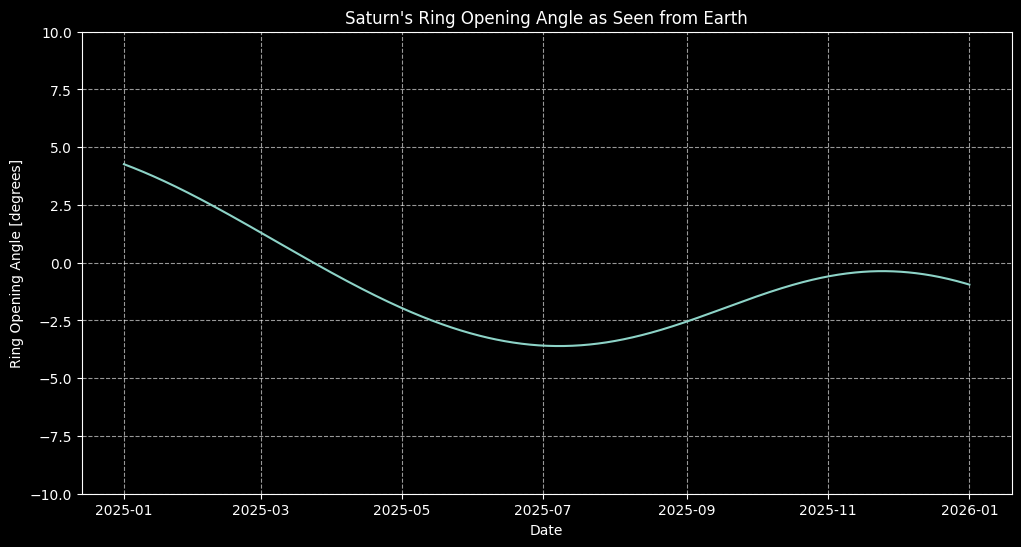

In [5]:
# Use a dark background
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

# Plot
plt.plot(times.datetime, ring_angles)

# Labels
plt.xlabel("Date")
plt.ylabel("Ring Opening Angle [degrees]")

# Title
plt.title("Saturn's Ring Opening Angle as Seen from Earth")

# Formatting
plt.grid(linestyle="dashed", alpha=0.6)
plt.ylim(-10, 10)
plt.show()